# Wine Quality Prediction

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [ ]:
# Read data and place them in DataFrame
df = pd.read_csv("winequality_white.csv", delimiter=';')
wine_train_df, wine_test_df = train_test_split(df)
wine_train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4594,5.8,0.42,0.30,2.2,0.035,26.0,129.0,0.98900,3.32,0.47,12.9,6
2675,7.2,0.32,0.24,5.6,0.033,23.0,120.0,0.99334,2.92,0.66,10.3,7
915,5.6,0.29,0.05,0.8,0.038,11.0,30.0,0.99240,3.36,0.35,9.2,5
795,7.2,0.31,0.26,7.3,0.050,37.0,157.0,0.99625,3.09,0.43,9.0,5
2768,7.7,0.30,0.34,1.2,0.048,4.0,119.0,0.99084,3.18,0.34,12.1,6


In [ ]:
tree_reg = DecisionTreeRegressor() # I did not give any parameters here, this is just for observing
tree_reg.fit(wine_train_df.drop('quality', axis=1), wine_train_df['quality'])

DecisionTreeRegressor()

In [ ]:
pred_train = tree_reg.predict(wine_train_df.drop('quality', axis=1))
print("Train set score: {:.2f}".format(np.mean(pred_train == wine_train_df['quality'])))

Train set score: 1.00


It works well with training set but there may be overfitting

In [ ]:
pred_test = tree_reg.predict(wine_test_df.drop('quality', axis=1))
print("Test set score: {:.2f}".format(np.mean(pred_test == wine_test_df['quality'])))

Test set score: 0.61


In [ ]:
tree_reg.get_depth() # To check what values to use when testing for different max_depth values

25

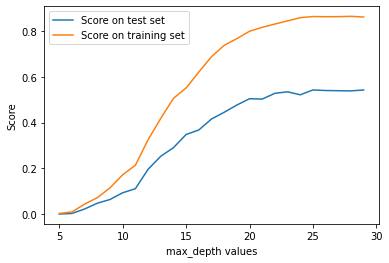

In [ ]:
# Try different max_depth values and observing scores on test and training sets by plotting them
depths = np.arange(5, 30)
errors_on_trainset = np.zeros(len(depths))
errors_on_testset = np.zeros(len(depths))
index = 0

for d in depths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(wine_train_df.drop('quality', axis=1),wine_train_df['quality']) # training
    u = tree_reg.predict(wine_test_df.drop('quality', axis=1)) # score on test set
    z = tree_reg.predict(wine_train_df.drop('quality', axis=1)) # score on training set
    errors_on_testset[index] = np.mean(u == wine_test_df['quality'])
    errors_on_trainset[index] = np.mean(z == wine_train_df['quality'])
    index += 1

pyplot.plot(depths, errors_on_testset, label='Score on test set')
pyplot.plot(depths, errors_on_trainset, label='Score on training set')
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score')
pyplot.legend()
pyplot.show()

Score does not change much after 25 for max_depth values. It looks like not limiting max_depth is okay.

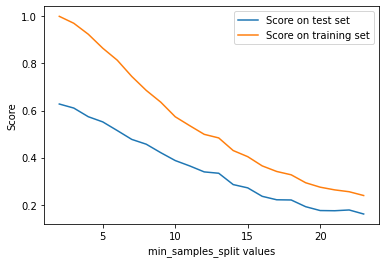

In [ ]:
# Try different min_samples_split values and observing scores on test and training sets by plotting them
samples = np.arange(2, 24)
errors_on_trainset = np.zeros(len(samples))
errors_on_testset = np.zeros(len(samples))
index = 0

for s in samples:
    tree_reg = DecisionTreeRegressor(min_samples_split=s)
    tree_reg.fit(wine_train_df.drop('quality', axis=1),wine_train_df['quality']) # training
    u = tree_reg.predict(wine_test_df.drop('quality', axis=1)) # score on test set
    z = tree_reg.predict(wine_train_df.drop('quality', axis=1)) # score on training set
    errors_on_testset[index] = np.mean(u == wine_test_df['quality'])
    errors_on_trainset[index] = np.mean(z == wine_train_df['quality'])
    index += 1

pyplot.plot(samples, errors_on_testset, label='Score on test set')
pyplot.plot(samples, errors_on_trainset, label='Score on training set')
pyplot.xlabel('min_samples_split values')
pyplot.ylabel('Score')
pyplot.legend()
pyplot.show()

Default value for min_samples_split, which is 2, looks okay too.

After trying many different *min_samples_split* and *max_depth values*, the default values turned out to be quite good.

In [ ]:
mean_squared_error(tree_reg.predict(wine_test_df.drop('quality',axis=1)), wine_test_df['quality'])

0.6533781785858568